In [299]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [300]:
data = pd.read_csv('./data/train.csv')

In [301]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [303]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
   

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [304]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [305]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.8,500)

Iteration:  0
[3 7 5 ... 3 5 5] [1 4 3 ... 1 9 2]
0.1231219512195122
Iteration:  10
[1 9 3 ... 1 4 0] [1 4 3 ... 1 9 2]
0.528390243902439
Iteration:  20
[1 9 7 ... 1 4 8] [1 4 3 ... 1 9 2]
0.47253658536585363
Iteration:  30
[1 4 3 ... 1 4 3] [1 4 3 ... 1 9 2]
0.5608536585365854
Iteration:  40
[1 4 3 ... 1 7 3] [1 4 3 ... 1 9 2]
0.623609756097561
Iteration:  50
[1 4 3 ... 1 7 3] [1 4 3 ... 1 9 2]
0.6743414634146342
Iteration:  60
[1 4 3 ... 1 7 3] [1 4 3 ... 1 9 2]
0.7090731707317073
Iteration:  70
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.7373170731707317
Iteration:  80
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.7634634146341464
Iteration:  90
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.7796829268292683
Iteration:  100
[1 9 3 ... 1 9 8] [1 4 3 ... 1 9 2]
0.7727560975609756
Iteration:  110
[1 9 3 ... 1 9 3] [1 4 3 ... 1 9 2]
0.808609756097561
Iteration:  120
[1 9 3 ... 1 9 3] [1 4 3 ... 1 9 2]
0.8173170731707317
Iteration:  130
[1 9 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.8322195121951219
Iteration:  140
[1 

In [306]:
def init_params():
    return W1,b1,W2,b2

W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.4,500)


print("W1 shape:", W1.shape)
print("b1 shape:", b1.shape)
print("W2 shape:", W2.shape)
print("b2 shape:", b2.shape)
print("W1 dtype:", W1.dtype)
print("b1 dtype:", b1.dtype)
print("W2 dtype:", W2.dtype)
print("b2 dtype:", b2.dtype)

Iteration:  0
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9082682926829269
Iteration:  10
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9097804878048781
Iteration:  20
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.910219512195122
Iteration:  30
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9105853658536586
Iteration:  40
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9108048780487805
Iteration:  50
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9109756097560976
Iteration:  60
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9115365853658537
Iteration:  70
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9119756097560976
Iteration:  80
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9123170731707317
Iteration:  90
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9127560975609756
Iteration:  100
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9130975609756098
Iteration:  110
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9133414634146342
Iteration:  120
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9136341463414634
Iteration:  130
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9139756097560976
Iteration:  140
[1

In [307]:
np.savetxt('./model/W1.csv',W1,delimiter=',')
np.savetxt('./model/W2.csv',W2,delimiter=',')
np.savetxt('./model/b1.csv',b1,delimiter=',')
np.savetxt('./model/b2.csv',b2,delimiter=',')

In [308]:

W1 = np.loadtxt('./model/W1.csv', delimiter=',')
b1 = np.loadtxt('./model/b1.csv',delimiter=',').reshape(-1, 1)
W2 = np.loadtxt('./model/W2.csv',delimiter=',')
b2 = np.loadtxt('./model/b2.csv',delimiter=',').reshape(-1, 1)


print("W1 shape:", W1.shape)
print("b1 shape:", b1.shape)
print("W2 shape:", W2.shape)
print("b2 shape:", b2.shape)
print("W1 dtype:", W1.dtype)
print("b1 dtype:", b1.dtype)
print("W2 dtype:", W2.dtype)
print("b2 dtype:", b2.dtype)



W1 shape: (10, 784)
b1 shape: (10, 1)
W2 shape: (10, 10)
b2 shape: (10, 1)
W1 dtype: float64
b1 dtype: float64
W2 dtype: float64
b2 dtype: float64


In [309]:
def init_params():
    return W1,b1,W2,b2

W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.01,1000)

Iteration:  0
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221219512195122
Iteration:  10
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9220975609756098
Iteration:  20
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9220975609756098
Iteration:  30
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9220975609756098
Iteration:  40
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221219512195122
Iteration:  50
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221219512195122
Iteration:  60
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221219512195122
Iteration:  70
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221219512195122
Iteration:  80
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9220975609756098
Iteration:  90
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221219512195122
Iteration:  100
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221219512195122
Iteration:  110
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221463414634147
Iteration:  120
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221463414634147
Iteration:  130
[1 4 3 ... 1 9 2] [1 4 3 ... 1 9 2]
0.9221219512195122
Iteration:  140
[

In [310]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


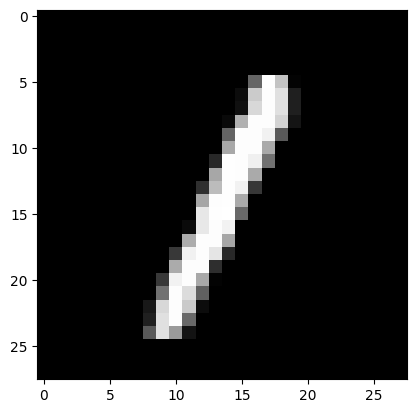

Prediction:  [4]
Label:  4


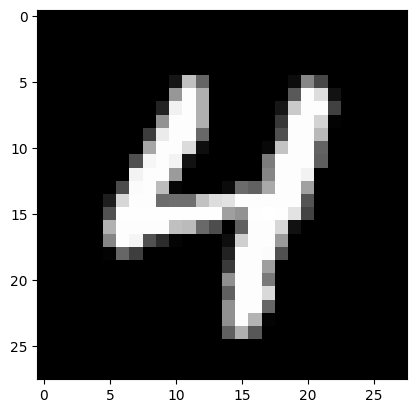

Prediction:  [3]
Label:  3


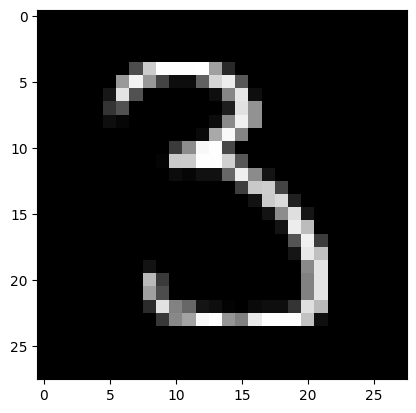

Prediction:  [5]
Label:  3


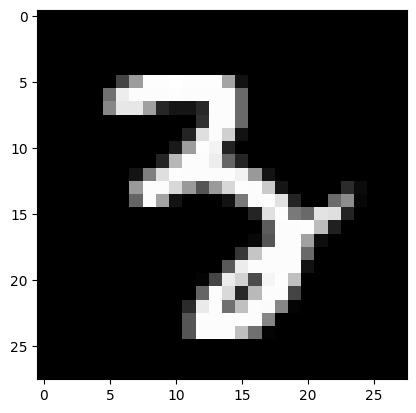

In [311]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [312]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 6 6 3 4 2 1 4 6 4 7 0 1 5 7 0 6 1 2 9 1 7 5 3 8 2 8 7 2 1 9 4 9 6 8 2 2
 1 5 1 6 1 7 6 0 1 8 4 2 1 6 3 5 6 1 3 1 5 4 4 4 4 6 6 8 5 7 9 4 3 4 9 9 4
 8 3 2 0 2 1 0 7 1 2 3 2 3 3 3 5 0 9 3 3 9 0 9 1 6 6 2 8 8 1 6 8 3 7 2 3 2
 5 4 8 4 4 3 6 2 3 4 5 9 4 2 1 3 4 5 5 4 3 7 4 2 7 3 5 7 1 4 9 8 8 2 7 3 2
 8 5 2 6 1 8 5 9 4 4 3 1 2 0 4 1 4 8 9 7 0 4 3 5 4 7 6 4 2 6 1 7 6 9 3 1 5
 9 2 9 6 2 8 5 9 1 0 5 1 6 2 7 9 7 5 0 2 3 2 1 1 3 0 8 8 8 8 2 2 6 8 2 4 4
 6 3 3 9 3 4 6 7 3 2 2 9 7 9 4 7 9 7 6 4 0 7 7 0 9 8 6 4 6 4 8 2 6 6 3 6 0
 1 9 5 8 6 9 3 2 7 5 3 0 6 5 4 4 1 2 3 3 0 3 5 9 8 9 2 5 4 5 5 2 6 5 6 9 0
 4 1 7 7 1 0 8 0 6 6 2 4 2 9 1 6 6 9 0 8 4 6 7 3 8 5 1 1 6 6 5 6 9 2 7 9 6
 8 6 9 1 3 1 2 2 0 3 3 7 4 8 7 6 3 0 8 8 5 6 1 4 0 7 7 8 1 3 8 3 2 6 0 2 7
 5 1 4 0 5 5 2 9 5 2 1 1 6 9 7 1 0 9 5 8 6 6 5 3 6 9 3 6 1 1 9 8 7 6 2 2 5
 1 5 8 3 2 9 9 1 8 1 6 1 8 0 2 7 1 9 1 6 9 6 2 6 1 1 8 2 7 0 9 5 5 5 1 7 1
 8 1 5 4 3 3 1 3 7 2 0 3 9 5 7 0 8 1 2 4 6 9 1 2 8 1 4 5 8 2 2 8 4 7 3 8 6
 1 7 4 2 1 5 2 5 6 9 8 8 

0.919